<a href="https://colab.research.google.com/github/mo72001/T5/blob/main/Weeklyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay

from sklearn.decomposition import PCA
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
df.shape

(12316, 32)

In [5]:
df.columns.tolist()

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [8]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7169,13:19:00,Saturday,31-50,Male,Elementary school,Employee,1-2yr,Public (12 seats),Owner,Unknown,...,Moving Backward,Pedestrian,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury


In [9]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [10]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,3363
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [11]:
df['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
Male,11437
Female,701
Unknown,178


In [12]:
df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
na,4443
Female,2620


In [13]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [14]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [15]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [16]:
dt_obj = dt.datetime.strptime(df['Time'].values[0], '%H:%M:%S')

dt.datetime.strftime(dt_obj, '%H')
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.strftime('%H')

print(df['Time'])

0        17
1        17
2        17
3        01
4        01
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: Time, Length: 12316, dtype: object


In [17]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [18]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [23]:
Le = LabelEncoder()
for col in cat_cols:
    df[col] = Le.fit_transform(df[col])
print(df[cat_cols])

       Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0        17            1                   0              1   
1        17            1                   1              1   
2        17            1                   0              1   
3         1            3                   0              1   
4         1            3                   0              1   
...     ...          ...                 ...            ...   
12311    16            6                   1              1   
12312    18            3                   4              1   
12313    13            3                   2              1   
12314    13            3                   0              0   
12315    13            3                   0              1   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                      0                        0                   0   
1                      4                        0                   3   
2                      4

In [24]:
St = StandardScaler()
df[num_cols] = St.fit_transform(df[num_cols])
print(df[num_cols])

       Number_of_vehicles_involved  Number_of_casualties
0                        -0.059061              0.448649
1                        -0.059061              0.448649
2                        -0.059061              0.448649
3                        -0.059061              0.448649
4                        -0.059061              0.448649
...                            ...                   ...
12311                    -0.059061             -0.544264
12312                    -0.059061             -0.544264
12313                    -1.510942             -0.544264
12314                    -0.059061             -0.544264
12315                    -0.059061             -0.544264

[12316 rows x 2 columns]


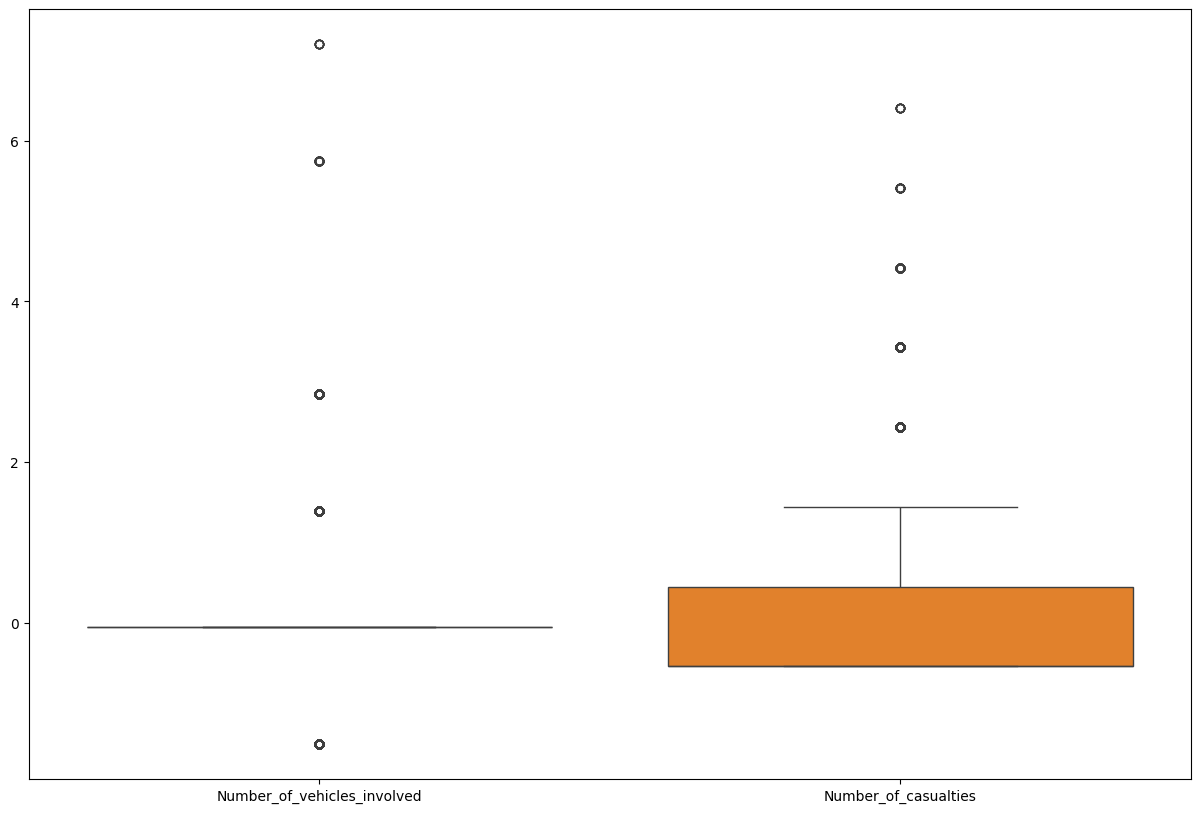

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_cols])
plt.show()

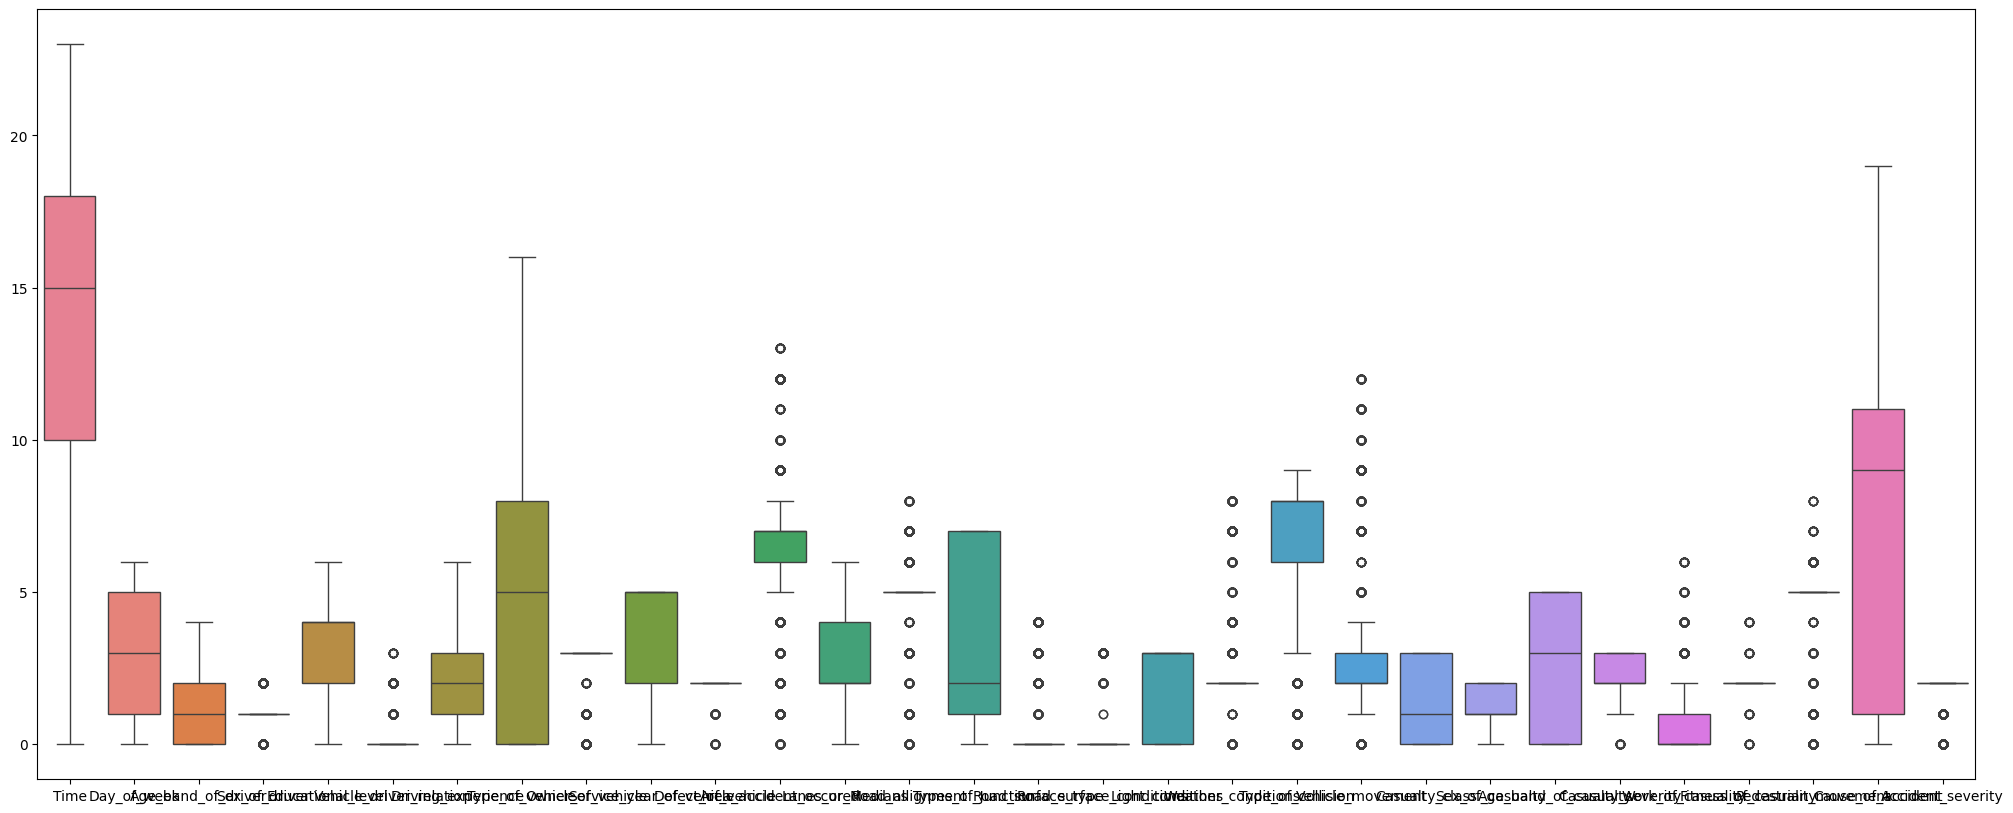

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df[cat_cols])
plt.show()

<Axes: xlabel='Time', ylabel='Accident_severity'>

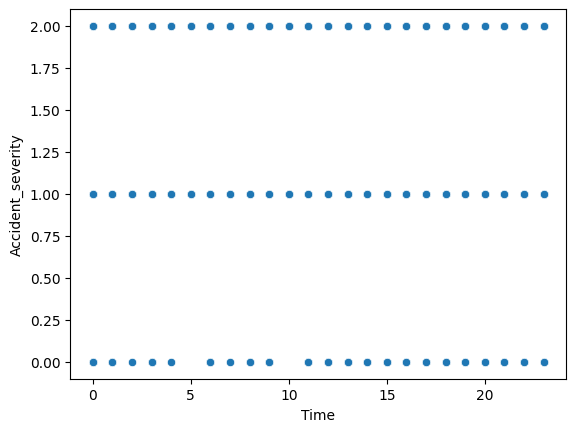

In [27]:
sns.scatterplot(x=df['Time'], y=df['Accident_severity'])

In [28]:
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Casualty_severity','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

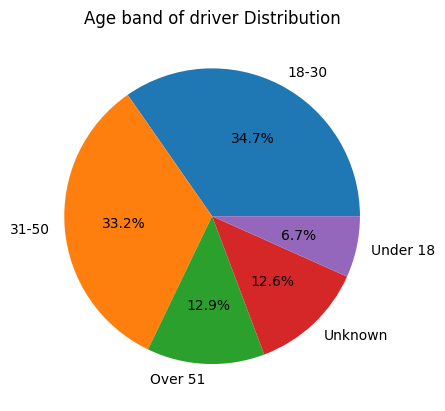

In [19]:
plt.pie(df['Age_band_of_driver'].value_counts(), labels=df['Age_band_of_driver'].value_counts().index, autopct='%1.1f%%')
plt.title('Age band of driver Distribution')
plt.show()

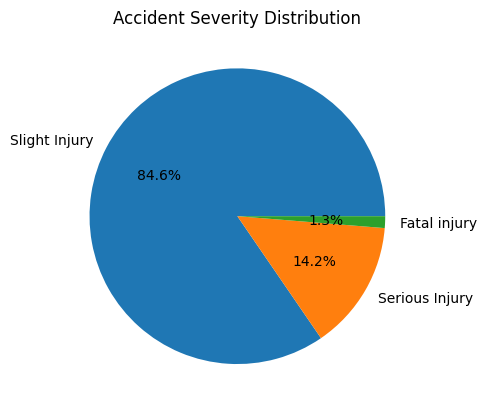

In [20]:
plt.pie(df['Accident_severity'].value_counts(), labels=df['Accident_severity'].value_counts().index, autopct='%1.1f%%')
plt.title('Accident Severity Distribution')
plt.show()

<Axes: >

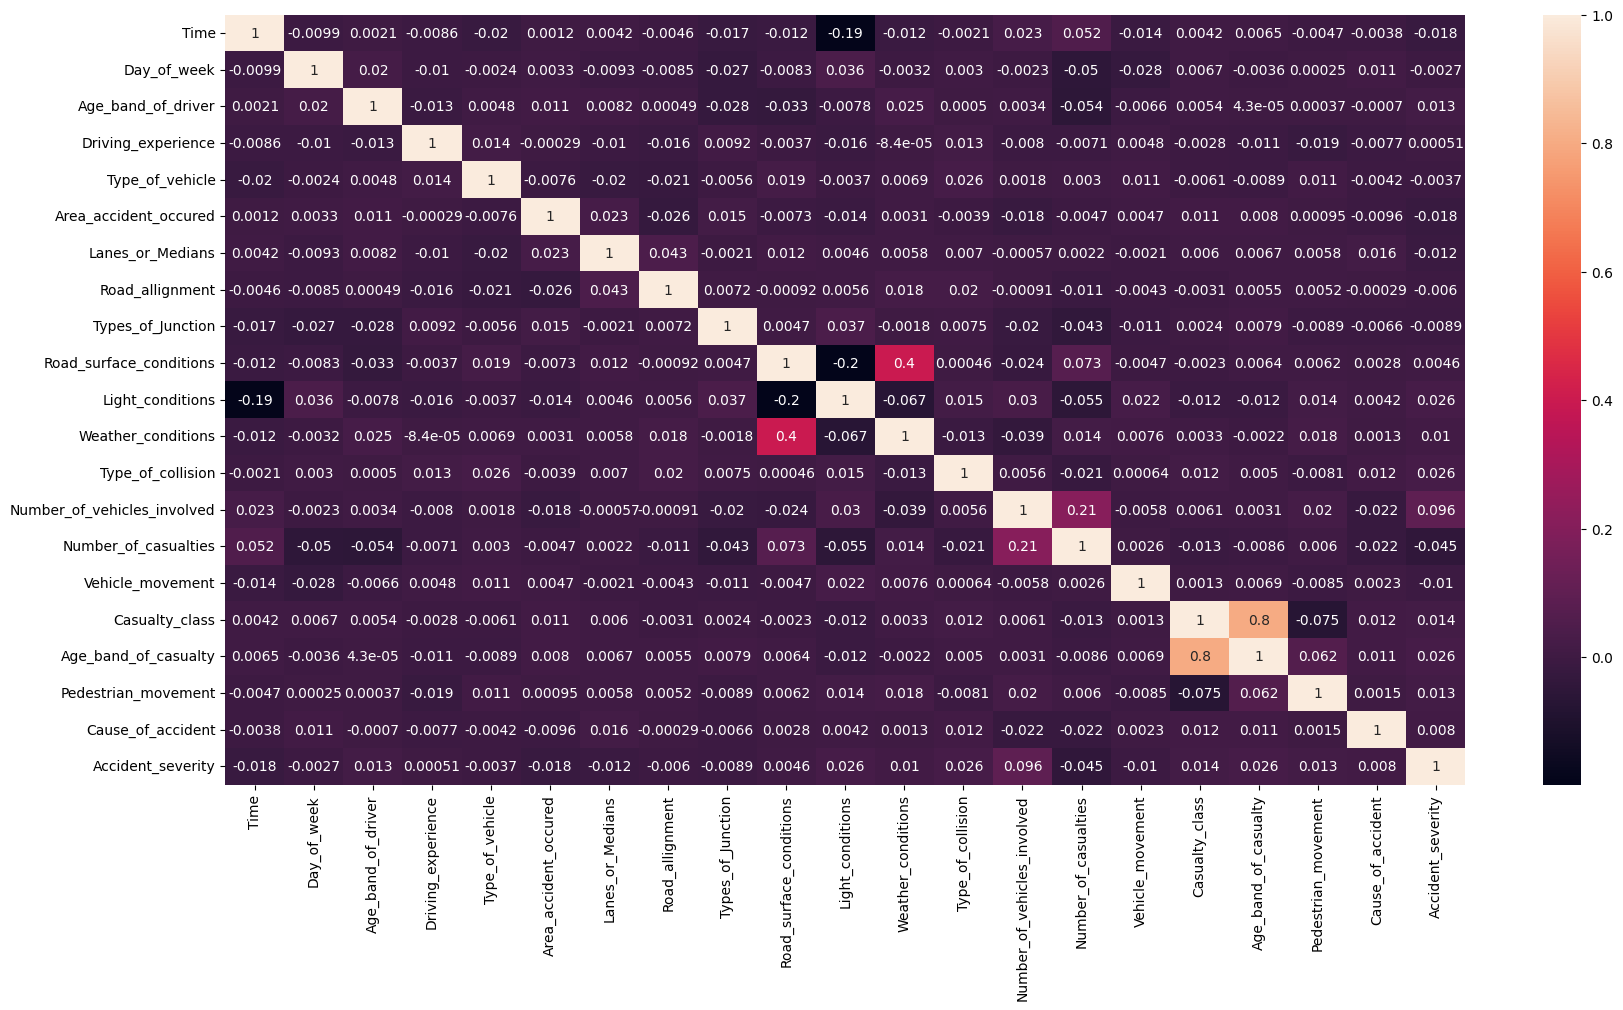

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  int64  
 1   Day_of_week                  12316 non-null  int64  
 2   Age_band_of_driver           12316 non-null  int64  
 3   Driving_experience           12316 non-null  int64  
 4   Type_of_vehicle              12316 non-null  int64  
 5   Area_accident_occured        12316 non-null  int64  
 6   Lanes_or_Medians             12316 non-null  int64  
 7   Road_allignment              12316 non-null  int64  
 8   Types_of_Junction            12316 non-null  int64  
 9   Road_surface_conditions      12316 non-null  int64  
 10  Light_conditions             12316 non-null  int64  
 11  Weather_conditions           12316 non-null  int64  
 12  Type_of_collision            12316 non-null  int64  
 13  Number_of_vehicl

<Axes: >

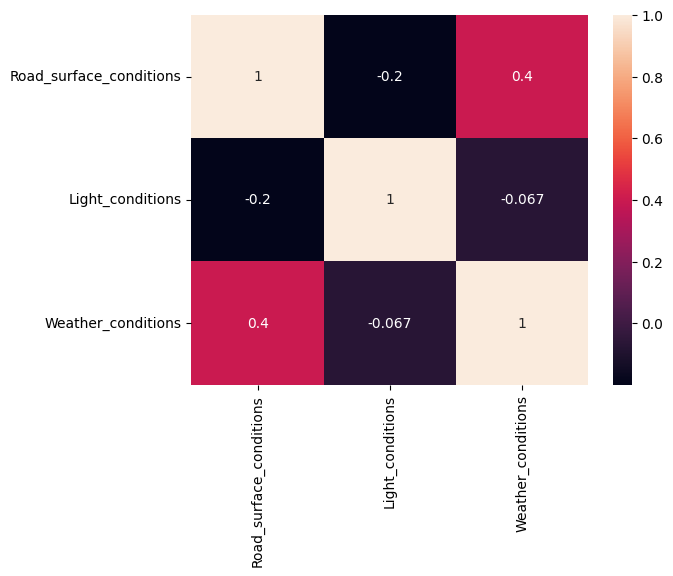

In [31]:
sns.heatmap(df[['Road_surface_conditions','Light_conditions','Weather_conditions']].corr(), annot=True)

<Axes: >

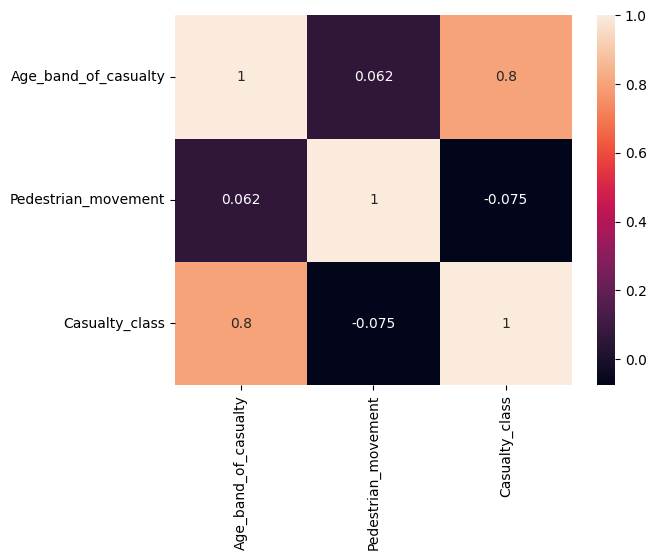

In [32]:
sns.heatmap(df[['Age_band_of_casualty','Pedestrian_movement','Casualty_class']].corr(), annot=True)

<Axes: xlabel='Time', ylabel='Day_of_week'>

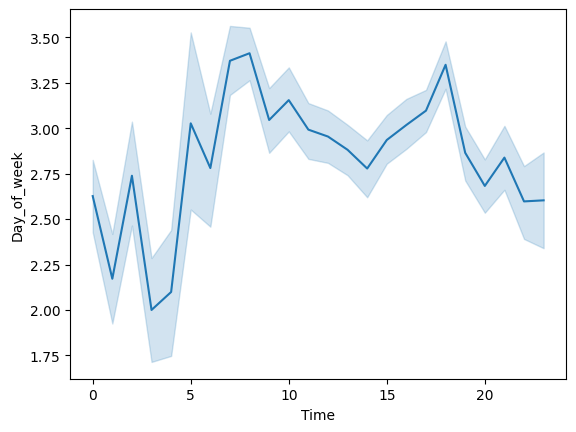

In [33]:
sns.lineplot(data=df , x= 'Time', y = 'Day_of_week')

<Axes: xlabel='Accident_severity', ylabel='Area_accident_occured'>

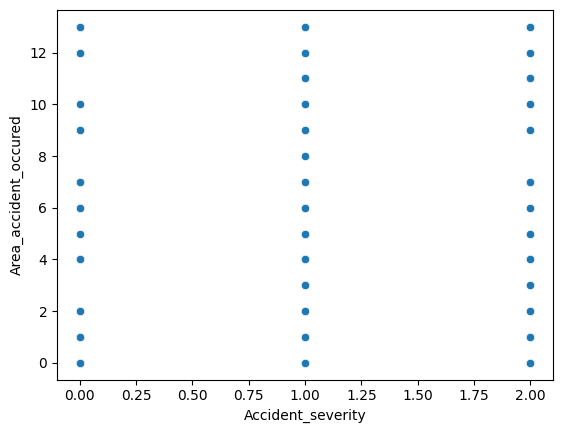

In [34]:
sns.scatterplot(data=df, x='Accident_severity', y='Area_accident_occured')

(array([2001., 1230., 1565., 2332., 1322., 1059., 1520.,  738.,  290.,
         259.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

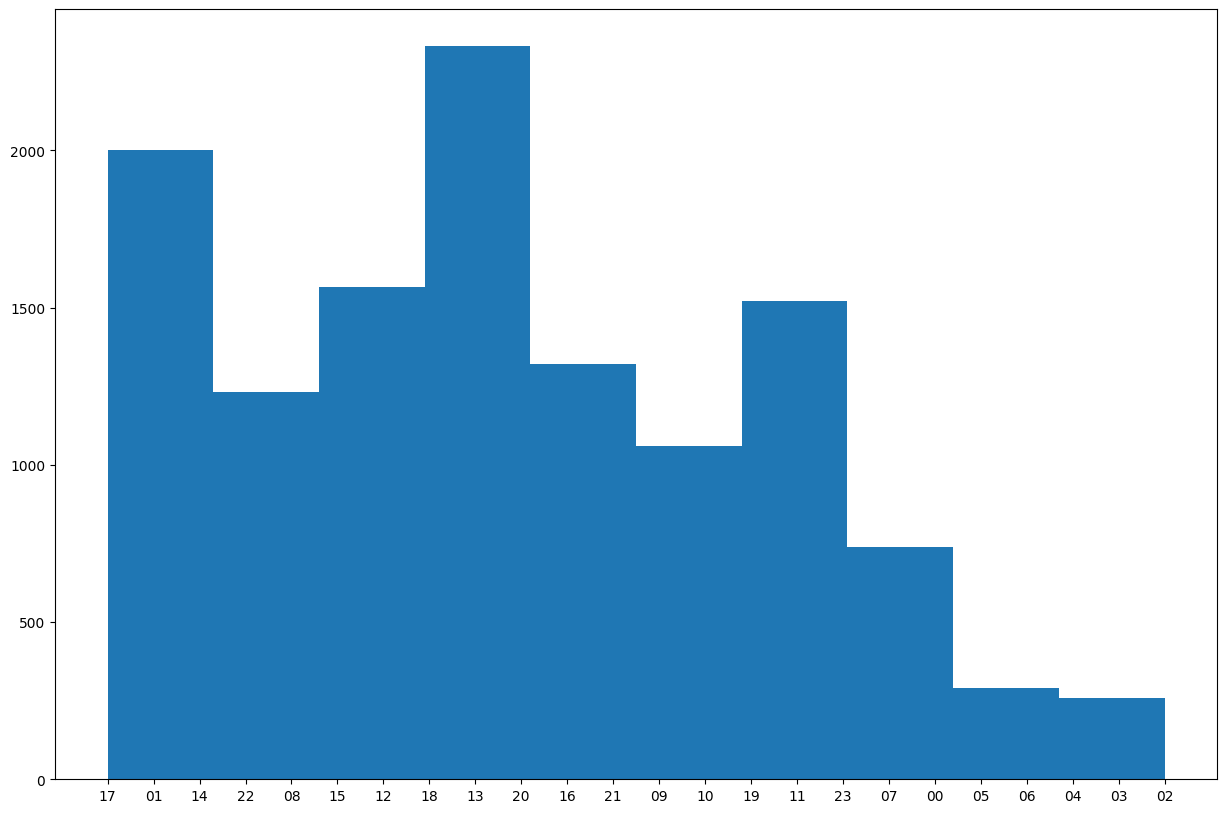

In [22]:
plt.figure(figsize=(15,10))
plt.hist(df['Time'])

<Axes: >

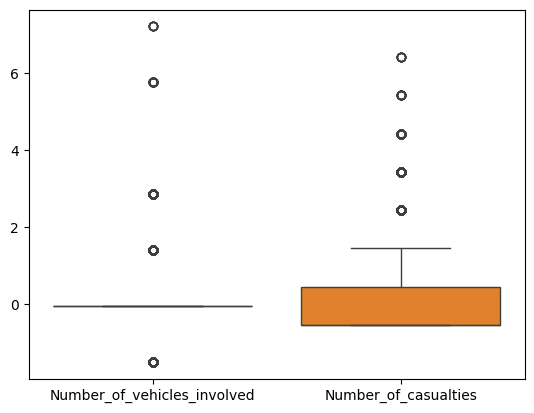

In [35]:
sns.boxplot(data=df[num_cols])

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [36]:
x = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']
#x, y = make_classification(random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9852, 20) (2464, 20) (9852,) (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [37]:
pipe = make_pipeline(StandardScaler(),Normalizer() ,LogisticRegression())
pipe.fit(x_train, y_train)
pipe.score(x_train, y_train)


0.845107592367032

#### Decision Tree Classifier

In [38]:
pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe1.fit(x_train, y_train)
pipe1.score(x_train, y_train)

1.0

#### Support Vector Machine (SVM)

In [39]:
pipe2 = make_pipeline(StandardScaler(), SVC())
pipe2.fit(x_train, y_train)
pipe2.score(x_train, y_train)

0.8468331303288672

#### K-Neighbors Classifier

In [40]:
pipe3 = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe3.fit(x_train, y_train)
pipe3.score(x_train, y_train)

0.8596224116930572

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

# Confusion matric

In [41]:
y_pred = pipe.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[   0    0   28]
 [   0    0  347]
 [   0    0 2089]]


In [57]:
y_pred = pipe1.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[   6    5   17]
 [   6   96  245]
 [  31  340 1718]]


In [58]:
y_pred = pipe2.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[   0    0   28]
 [   0    3  344]
 [   0    0 2089]]


In [59]:
y_pred = pipe3.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[   0    1   27]
 [   0   22  325]
 [   2   71 2016]]


# Accuracy

In [61]:
y_pred1 = pipe.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.8478084415584416


In [42]:
y_pred1 = pipe1.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.7386363636363636


In [62]:
y_pred1 = pipe2.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.849025974025974


In [63]:
y_pred1 = pipe3.predict(x_test)
print(accuracy_score(y_test, y_pred1))

0.8271103896103896


# Precision and Recall

In [74]:
y_pred2 = pipe.predict(x_test)
print(precision_score(y_test, y_pred2, average='micro'))

0.8478084415584416


In [75]:
y_pred2 = pipe.predict(x_test)
print(recall_score(y_test, y_pred2, average='micro'))

0.8478084415584416


In [67]:
y_pred2 = pipe1.predict(x_test)
print(precision_score(y_test, y_pred2, average='micro'))

0.7386363636363636


In [68]:
y_pred2 = pipe1.predict(x_test)
print(recall_score(y_test, y_pred2, average='micro'))

0.7386363636363636


In [64]:
y_pred2 = pipe2.predict(x_test)
print(precision_score(y_test, y_pred2, average='micro'))

0.849025974025974


In [66]:
y_pred2 = pipe2.predict(x_test)
print(recall_score(y_test, y_pred2, average='micro'))

0.849025974025974


In [76]:
y_pred2 = pipe3.predict(x_test)
print(precision_score(y_test, y_pred2, average='micro'))

0.8271103896103896


In [77]:
y_pred2 = pipe3.predict(x_test)
print(recall_score(y_test, y_pred2, average='micro'))

0.8271103896103896


# F1 score

In [78]:
y_pred3 = pipe.predict(x_test)
print(f1_score(y_test, y_pred3, average='micro'))

0.8478084415584416


In [79]:
y_pred3 = pipe1.predict(x_test)
print(f1_score(y_test, y_pred3, average='micro'))

0.7386363636363636


In [80]:
y_pred3 = pipe2.predict(x_test)
print(f1_score(y_test, y_pred3, average='micro'))

0.849025974025974


In [44]:
y_pred3 = pipe3.predict(x_test)
print(f1_score(y_test, y_pred3, average='micro'))

0.8271103896103896


# ROC Curve and AUC

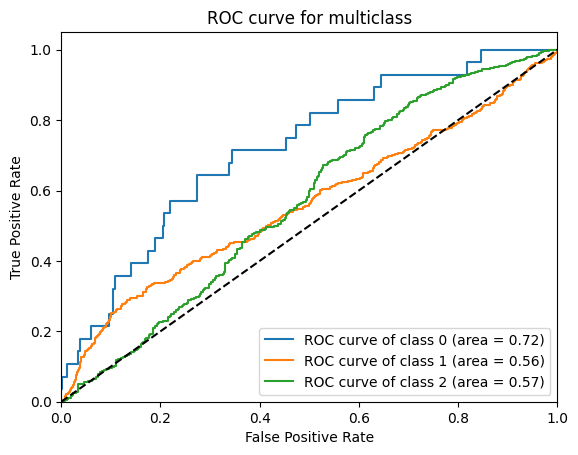

In [54]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pipe.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(loc="lower right")
plt.show()


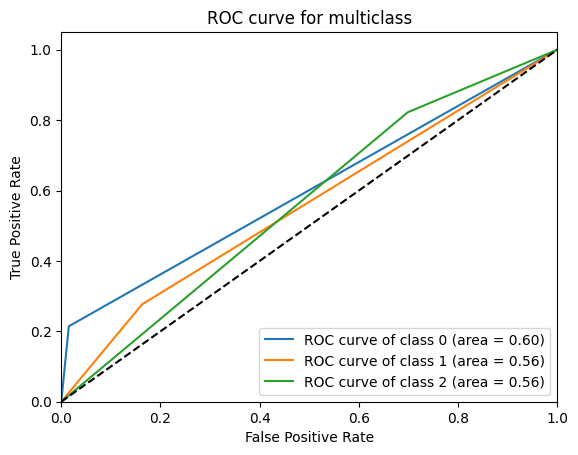

In [69]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pipe1.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(loc="lower right")
plt.show()


In [81]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pipe2.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(loc="lower right")
plt.show()


AttributeError: predict_proba is not available when probability=False

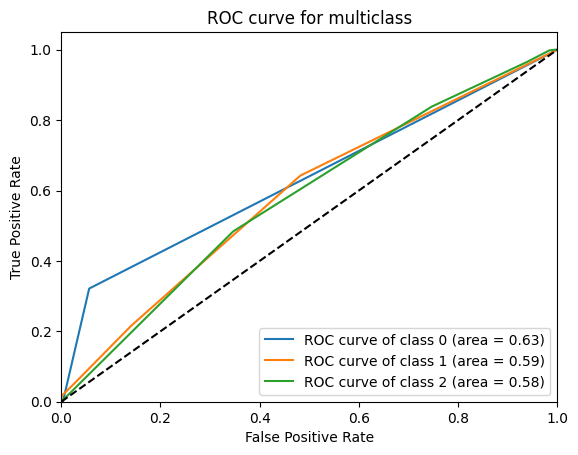

In [73]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pipe3.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass')
plt.legend(loc="lower right")
plt.show()


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

After Comparing between model ot seems SVM achice best value on each valdate, but encounter on ruc curve there is some obtecl I counter douring testing the models.
Needing go forther understanding on ROC Curve and AUC.

Algorithm Exploration: Experiment with other advanced algorithms like Gradient Boosting, XGBoost, or neural networks.

Feature Engineering: Create new features or transform existing ones to improve model input quality.

Hyperparameter Tuning: Further optimize hyperparameters using techniques like Grid Search or Random Search.

Ensemble Methods: Combine multiple models to enhance performance and mitigate individual model weaknesses.

Data Augmentation: Increase dataset size and variability to improve model generalization and reduce overfitting.

